<h1>Testando modelos com as 30 melhores colunas</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.linear_model import LogisticRegression # algoritmo Regressão Logística
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('datasets/DADOS_ED_PROCESSADOS.csv', encoding="latin-1", sep = ';')

In [3]:
df_ed = df.iloc[:,:-1]
alvo = df.iloc[:,-1].values

print(alvo)

#NORMALIZAR O CONJUNTO SEPARADO

scaler = MinMaxScaler()
col_names = df_ed.columns

# Transformar os atributos
df_ed = pd.DataFrame(scaler.fit_transform(df_ed))
df_ed.columns = col_names

df_ed

[0 0 0 ... 0 0 0]


,TX_APR,TX_REP,TX_ABD,TNR,TDI,IRD,IED_NIVEL1,IED_NIVEL2,IED_NIVEL3,IED_NIVEL4,...,QT_DOC_ESP_CE,QT_TUR_INF,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,0.387947,0.634766,0.000000,0.073996,0.049779,0.550,0.500,0.000,0.000,0.500,...,0.000000,0.025641,0.0,0.0,0.000000,0.000000,0.000,0.046154,0.046154,0.00
1,0.994350,0.005859,0.000000,0.022199,0.094027,0.675,0.736,0.053,0.053,0.105,...,0.000000,0.000000,0.0,0.0,0.112360,0.000000,0.625,0.569231,0.569231,0.00
2,0.741996,0.259766,0.008850,0.028541,0.046460,0.800,0.300,0.400,0.300,0.000,...,0.000000,0.051282,0.0,0.0,0.000000,0.000000,0.000,0.138462,0.138462,0.00
3,0.975518,0.025391,0.000000,0.051797,0.068584,0.575,0.600,0.000,0.000,0.400,...,0.000000,0.051282,0.0,0.0,0.000000,0.000000,0.000,0.107692,0.107692,0.00
4,0.896422,0.072266,0.039823,0.028541,0.070796,0.600,0.250,0.750,0.000,0.000,...,0.000000,0.051282,0.0,0.0,0.000000,0.000000,0.000,0.046154,0.046154,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32209,0.864407,0.093750,0.053097,0.022199,0.248894,0.425,0.000,0.297,0.407,0.259,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.323077,0.323077,0.00
32210,0.966102,0.035156,0.000000,0.029598,0.203540,0.300,0.000,0.346,0.423,0.231,...,0.324324,0.000000,0.0,0.0,0.067416,0.067416,0.000,0.276923,0.184615,0.24
32211,0.922787,0.080078,0.000000,0.023256,0.220133,0.325,0.000,0.381,0.524,0.095,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.323077,0.323077,0.00
32212,0.798493,0.208984,0.000000,0.057082,0.329646,0.450,0.000,0.390,0.537,0.049,...,0.000000,0.000000,0.0,0.0,0.134831,0.134831,0.000,0.323077,0.323077,0.00


In [5]:
df_classif = df.loc[:,['IN_LIXO_QUEIMA', 'AFD_GRP5', 'DSU', 'IN_MATERIAL_PED_DESPORTIVA', 'IN_INTERNET_ALUNOS', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES_COBERTA', 'TP_LOCALIZACAO', 'IN_QUADRA_ESPORTES',
                       'IN_ESGOTO_FOSSA', 'QT_DESKTOP_ALUNO', 'TX_REP', 'IN_ESGOTO_REDE_PUBLICA', 'AFD_GRP1', 'QT_EQUIP_SOM', 'IN_INTERNET_APRENDIZAGEM', 'TX_ABD', 'IN_ORGAO_ASS_PAIS_MESTRES',
                       'TX_APR', 'TDI','IN_BIBLIOTECA_SALA_LEITURA','IN_EJA_FUND','IN_MATERIAL_PED_DIFUSAO','IN_EJA','IN_MATERIAL_PED_ARTISTICAS','IN_SALA_PROFESSOR','IN_AGUA_REDE_PUBLICA','IN_LIXO_DESTINO_FINAL_PUBLICO',
                       'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_LABORATORIO_INFORMATICA']]

df_classif_train, df_classif_test, alvo_train, alvo_test =  train_test_split(df_classif, alvo, test_size=0.20, random_state=7)


df_chi2 = df.loc[:,['IN_ESGOTO_FOSSA_COMUM', 'IN_ORGAO_GREMIO_ESTUDANTIL', 'IN_LABORATORIO_INFORMATICA', 'IN_NOTURNO', 'IN_QUADRA_ESPORTES', 'IN_AGUA_POCO_ARTESIANO',
                    'IN_INTERNET_APRENDIZAGEM', 'IN_INTERNET_ALUNOS', 'IN_MATERIAL_PED_ARTISTICAS', 'IN_QUADRA_ESPORTES_COBERTA', 'IN_ESGOTO_REDE_PUBLICA', 'TDI', 'IN_EJA_FUND',
                    'IN_ESGOTO_FOSSA', 'IN_EJA', 'IN_LIXO_DESTINO_FINAL_PUBLICO', 'IN_PARQUE_INFANTIL', 'TP_LOCALIZACAO', 'IN_LIXO_QUEIMA', 'IN_ORGAO_ASS_PAIS_MESTRES',
                    'IN_REFEITORIO','IN_FUNDAMENTAL_CICLOS','IN_MATERIAL_PED_DIFUSAO','IN_ACESSIBILIDADE_CORRIMAO','IN_ESGOTO_FOSSA_SEPTICA','IN_EQUIP_LOUSA_DIGITAL',
                    'IN_INTERNET_COMUNIDADE','AFD_GRP5','IN_MATERIAL_PED_ETNICO','IN_MATERIAL_PED_MULTIMIDIA']]


df_chi2_train, df_chi2_test, alvo_train, alvo_test =  train_test_split(df_chi2, alvo, test_size=0.20, random_state=7)


df_mutual = df.loc[:,['IN_MATERIAL_PED_DIFUSAO','IN_EJA_FUND','QT_TUR_EJA_FUND','IN_DESKTOP_ALUNO','IED_NIVEL1','TNR','IN_AGUA_REDE_PUBLICA','AFD_GRP5','IN_TRATAMENTO_LIXO_SEPARACAO','DSU','QT_EQUIP_TV',
'IN_PARQUE_INFANTIL','IN_ESGOTO_FOSSA','TP_LOCALIZACAO','IN_MATERIAL_PED_DESPORTIVA','IN_QUADRA_ESPORTES_COBERTA','IN_QUADRA_ESPORTES','IN_ESGOTO_REDE_PUBLICA','IN_TRATAMENTO_LIXO_INEXISTENTE',
'IN_ACESSO_INTERNET_COMPUTADOR','QT_DESKTOP_ALUNO','AFD_GRP1','IN_INTERNET_APRENDIZAGEM','QT_EQUIP_SOM','IN_ORGAO_ASS_PAIS_MESTRES','TX_REP','TX_ABD','TX_APR','TDI','IN_INTERNET_ALUNOS']]


df_mutual_train, df_mutual_test, alvo_train, alvo_test =  train_test_split(df_mutual, alvo, test_size=0.20, random_state=7)


df_rf = df.loc[:,['TX_APR','TX_REP','TX_ABD','TNR','TDI','IRD','IED_NIVEL1','IED_NIVEL2','IED_NIVEL3','IED_NIVEL4','HAD','ATU','AFD_GRP1','AFD_GRP3','AFD_GRP5',
                   'IN_TRATAMENTO_LIXO_INEXISTENTE','QT_SALAS_UTILIZADAS_DENTRO','QT_SALAS_UTILIZADAS','QT_EQUIP_SOM','QT_EQUIP_TV','QT_EQUIP_MULTIMIDIA','QT_DESKTOP_ALUNO',
                   'QT_PROF_SERVICOS_GERAIS','IN_ORGAO_ASS_PAIS_MESTRES','QT_MAT_FUND','QT_DOC_FUND','QT_DOC_ESP','QT_DOC_ESP_CC','QT_TUR_ESP','QT_TUR_ESP_CC']]
df_rf_train, df_rf_test, alvo_train, alvo_test =  train_test_split(df_rf, alvo, test_size=0.20, random_state=7)


df_et = df.loc[:,["AFD_GRP5","IRD","QT_EQUIP_TV","IED_NIVEL5","IGC","HAD","IN_EJA","IED_NIVEL1","IN_TRATAMENTO_LIXO_INEXISTENTE","IN_MATERIAL_PED_ARTISTICAS","IN_QUADRA_ESPORTES",
                  "QT_EQUIP_SOM","IED_NIVEL2","IED_NIVEL3","ATU","IN_INTERNET_ALUNOS","AFD_GRP3","IN_ESGOTO_FOSSA","IED_NIVEL4","TNR","IN_QUADRA_ESPORTES_COBERTA","IN_ESGOTO_REDE_PUBLICA",
                  "AFD_GRP1","IN_PARQUE_INFANTIL","TX_REP","IN_INTERNET_APRENDIZAGEM","TX_ABD","TX_APR","IN_ORGAO_ASS_PAIS_MESTRES","TDI"]]
df_et_train, df_et_test, alvo_train, alvo_test =  train_test_split(df_et, alvo, test_size=0.20, random_state=7)



In [6]:
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7) 

LR: 0.747662 (0.006048)
KNN: 0.699779 (0.009354)
CART: 0.661208 (0.014049)
NB: 0.716852 (0.005454)
SVM: 0.735284 (0.007769)


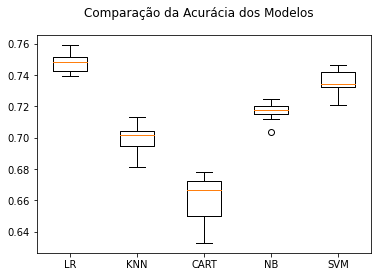

In [7]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_classif_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.733848 (0.006302)
KNN: 0.702572 (0.008730)
CART: 0.644135 (0.005776)
NB: 0.697761 (0.009771)
SVM: 0.731481 (0.005702)


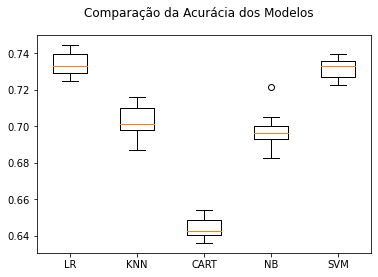

In [8]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_chi2_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.750107 (0.006012)
KNN: 0.699003 (0.008021)
CART: 0.664584 (0.007968)
NB: 0.718055 (0.007435)
SVM: 0.737767 (0.010542)


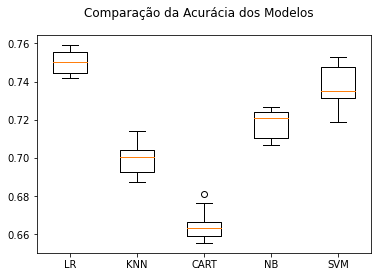

In [9]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_mutual_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.740134 (0.008406)
KNN: 0.645338 (0.010459)
CART: 0.662644 (0.010313)
NB: 0.699895 (0.007408)
SVM: 0.723720 (0.007781)


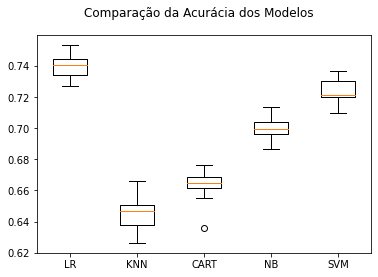

In [10]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_rf_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.748399 (0.009736)
KNN: 0.672888 (0.006112)
CART: 0.667882 (0.009005)
NB: 0.715765 (0.008599)
SVM: 0.737651 (0.008462)


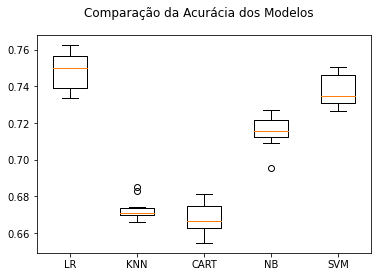

In [11]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_et_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()